# Exploratory Data Analysis of Movielens Dataset

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Analysis - Movies.csv

In [175]:
df_movies = pd.read_csv("assets/movies.csv")

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [176]:
df_movies.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [177]:
df_movies.describe()

,movieId
count,58098.000000
mean,111919.516197
std,59862.660956
min,1.000000
25%,72437.750000
50%,126549.000000
75%,161449.500000
max,193886.000000


## Initial Analysis - Ratings.csv

In [178]:
df_ratings = pd.read_csv("assets/ratings.csv")

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


Converting epoch to datetime format

In [189]:
df_ratings["timestamp"] = pd.to_datetime(df_ratings["timestamp"], unit='s')

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,2009-10-27 21:00:21
1,1,481,3.5,2009-10-27 21:04:16
2,1,1091,1.5,2009-10-27 21:04:31
3,1,1257,4.5,2009-10-27 21:04:20
4,1,1449,4.5,2009-10-27 21:01:04


In [196]:
earliest = df_ratings["timestamp"].min()
latest = df_ratings["timestamp"].max()

print(f"Dataset contains rating data from {earliest.year} to {latest.year}")

Dataset contains rating data from 1995 to 2018


In [180]:
df_ratings.info(show_counts = True) # no missing values
# TODO: consider changing datatypes from numpy integer to flex size, smaller size but might be slower for calculations due to not being fixed?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype         
---  ------     --------------     -----         
 0   userId     27753444 non-null  int64         
 1   movieId    27753444 non-null  int64         
 2   rating     27753444 non-null  float64       
 3   timestamp  27753444 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 847.0 MB


In [181]:
df_ratings.describe()

,userId,movieId,rating
count,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00
std,8.170740e+04,3.510263e+04,1.066353e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,7.117600e+04,1.097000e+03,3.000000e+00
50%,1.420220e+05,2.716000e+03,3.500000e+00
75%,2.124590e+05,7.150000e+03,4.000000e+00
max,2.832280e+05,1.938860e+05,5.000000e+00


In [200]:
df_ratings["rating"].mean() # average rating

3.5304452124932677

In [198]:
df_ratings["rating"].median() # average rating given by users

3.5

### Looking at rating distribution

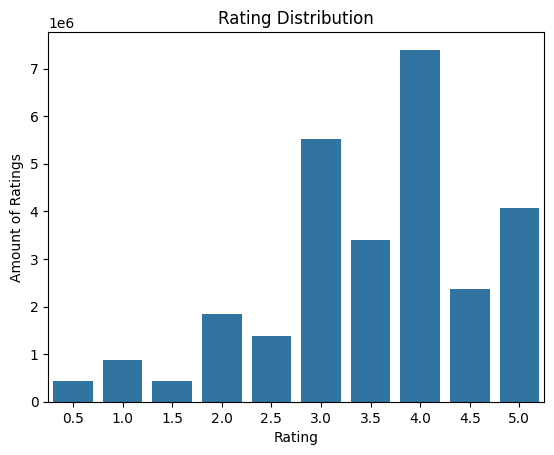

In [254]:
rating_counts = df_ratings["rating"].value_counts().sort_index()

ax = sns.barplot(x = rating_counts.index, y = rating_counts.values, color = "C0")
ax.set(title = "Rating Distribution", xlabel = "Rating", ylabel = "Amount of Ratings");

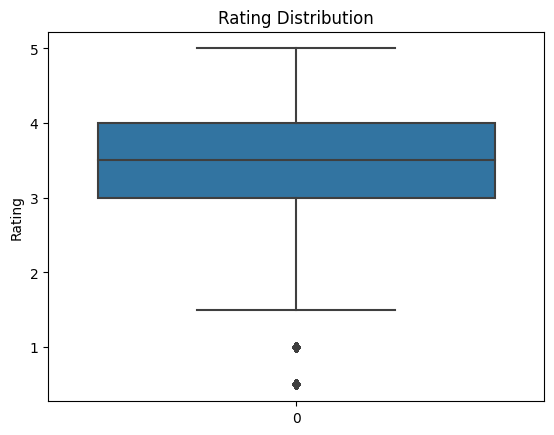

In [184]:
ax = sns.boxplot(df_ratings["rating"]);

ax.set(title = "Rating Distribution", ylabel = "Rating");

### Looking at most rated movies

In [201]:
head = df_ratings["movieId"].value_counts().head(10)

for i in head.index:
    title = df_movies[df_movies['movieId'] == i]['title'].values[0]
    ratings = head[i]
    mean_rating = df_ratings[df_ratings["movieId"] == i]["rating"].mean()

    print(f"{title} - {ratings:,} Ratings ({mean_rating:.1f} average rating)\n")

Shawshank Redemption, The (1994) - 97,999 Ratings (4.4 average rating)

Forrest Gump (1994) - 97,040 Ratings (4.1 average rating)

Pulp Fiction (1994) - 92,406 Ratings (4.2 average rating)

Silence of the Lambs, The (1991) - 87,899 Ratings (4.2 average rating)

Matrix, The (1999) - 84,545 Ratings (4.1 average rating)

Star Wars: Episode IV - A New Hope (1977) - 81,815 Ratings (4.1 average rating)

Jurassic Park (1993) - 76,451 Ratings (3.7 average rating)

Schindler's List (1993) - 71,516 Ratings (4.3 average rating)

Braveheart (1995) - 68,803 Ratings (4.0 average rating)

Toy Story (1995) - 68,469 Ratings (3.9 average rating)



### Looking at movie representation per year

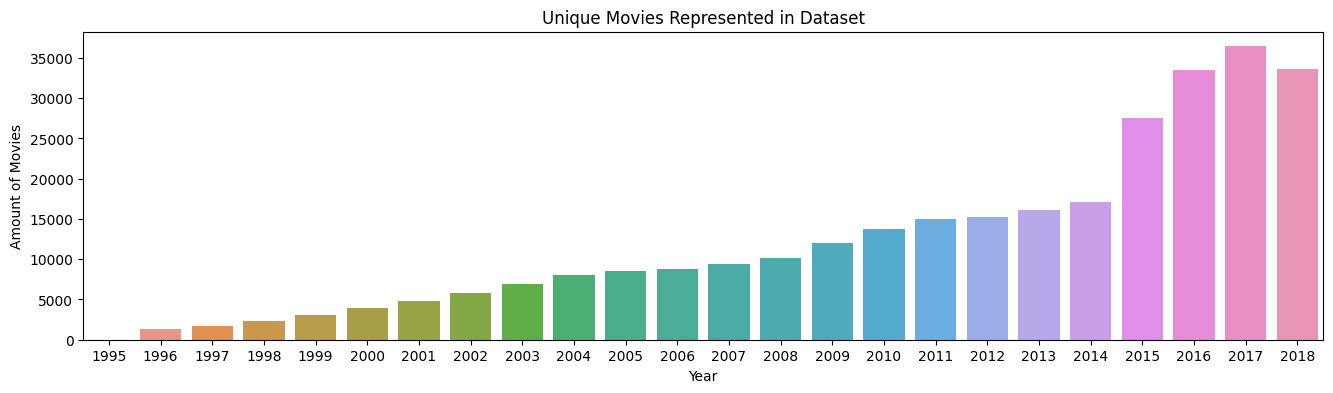

In [255]:
representation = df_ratings.groupby(df_ratings.timestamp.dt.year)["movieId"].nunique() # group by year, then get number of unique movieIds for each year

plt.figure(figsize=(16, 4))

ax = sns.barplot(x = representation.index, y = representation.values) # plot indices (years) against values (n unique movieIds)

ax.set(title = "Unique Movies Represented in Dataset", xlabel = "Year", ylabel = "Amount of Movies");